#### Pitch basic visualization

In [31]:
import matplotlib.pyplot as plt
from mplsoccer import Pitch, VerticalPitch
import pandas as pd

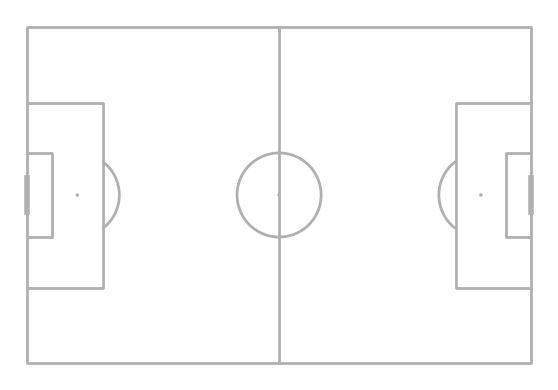

In [2]:
pitch = Pitch()
# specifying figure size (width, height)
fig, ax = pitch.draw(figsize=(8, 4))

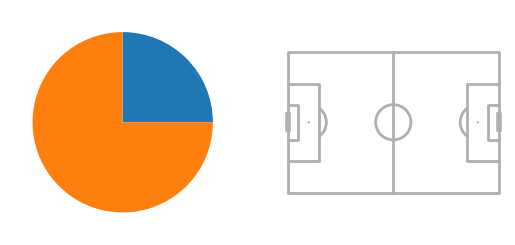

In [3]:
fig, axs = plt.subplots(nrows=1, ncols=2)
pitch = Pitch()
pie = axs[0].pie(x=[5, 15])
pitch.draw(ax=axs[1])


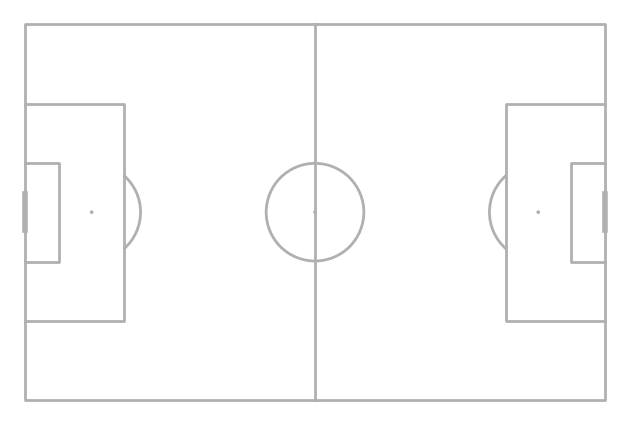

In [4]:
pitch = Pitch(pitch_type='opta')  # example plotting an Opta/ Stats Perform pitch
fig, ax = pitch.draw()

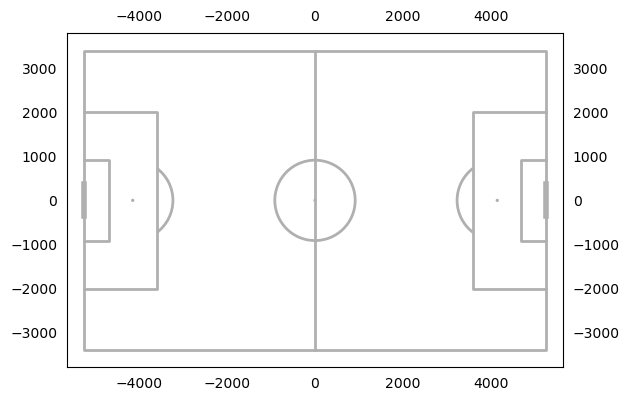

In [5]:
pitch = Pitch(pitch_type='tracab',  # example plotting a tracab pitch
              pitch_length=105, pitch_width=68,
              axis=True, label=True)  # showing axis labels is optional
fig, ax = pitch.draw()

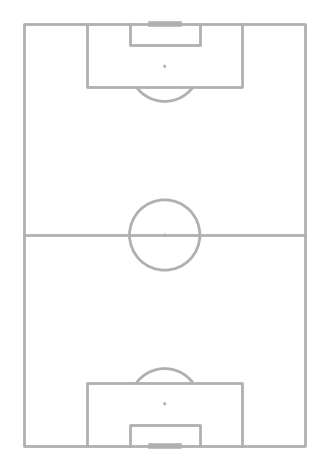

In [6]:
pitch = VerticalPitch(half=False)
fig, ax = pitch.draw()

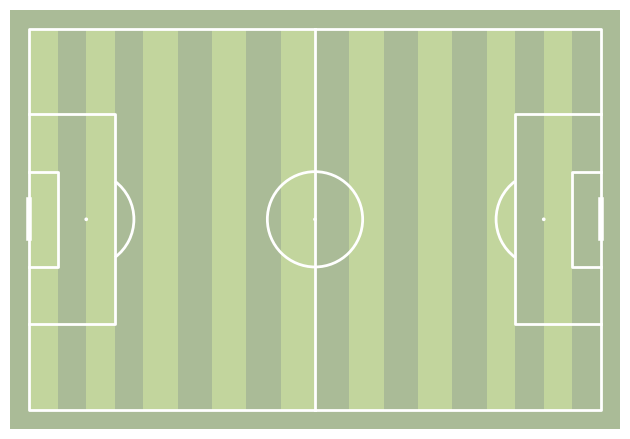

In [7]:
pitch = Pitch(pitch_color='#aabb97', line_color='white',
              stripe_color='#c2d59d', stripe=True)  # optional stripes
fig, ax = pitch.draw()

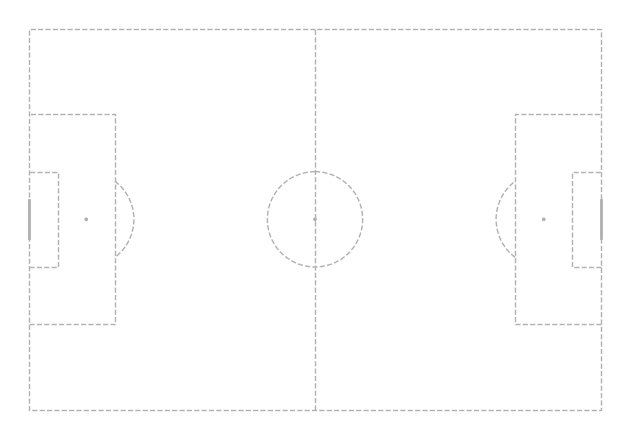

In [8]:
pitch = Pitch(linestyle='--', linewidth=1, goal_linestyle='-')
fig, ax = pitch.draw()

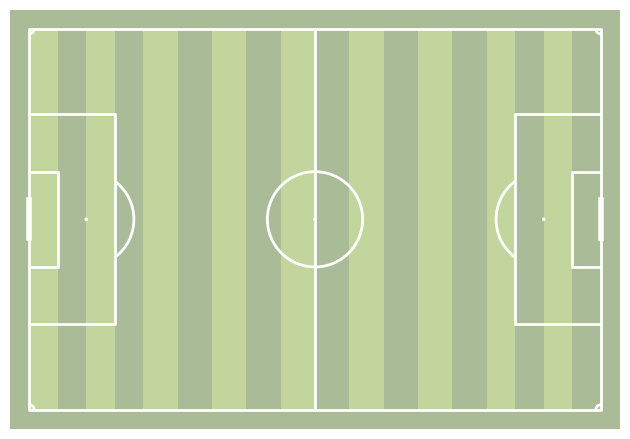

In [9]:
pitch = Pitch(pitch_color='#aabb97', line_color='white',
              stripe_color='#c2d59d', stripe=True, corner_arcs=True)  # optional stripes
fig, ax = pitch.draw()

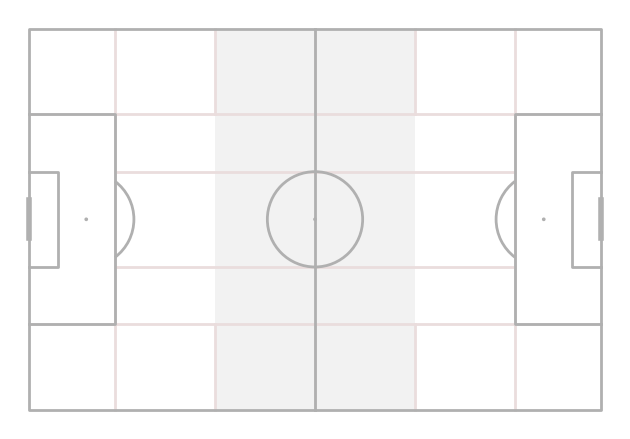

In [10]:
pitch = Pitch(positional=True, shade_middle=True, positional_color='#eadddd', shade_color='#f2f2f2')
fig, ax = pitch.draw()


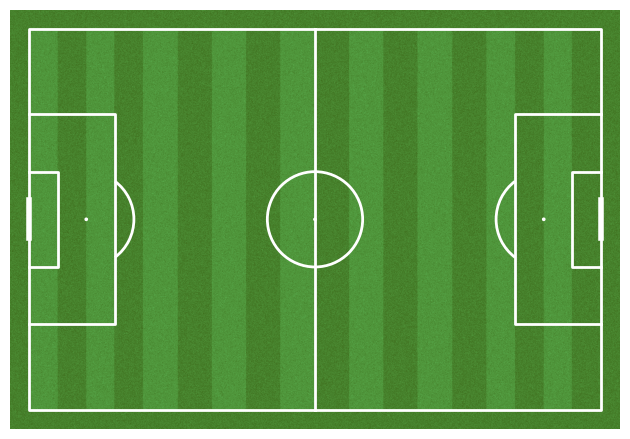

In [11]:
pitch = Pitch(pitch_color='grass', line_color='white',
              stripe=True)  # optional stripes
fig, ax = pitch.draw()


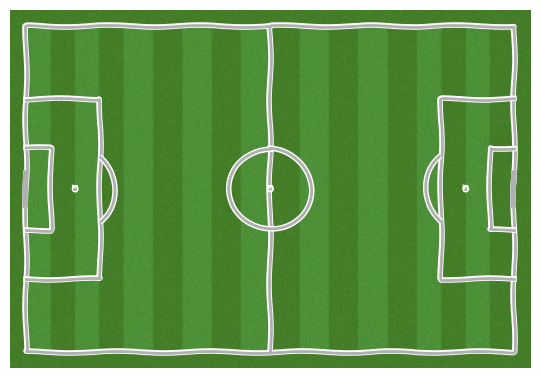

In [14]:
## sketch style mode

plt.xkcd()
pitch = Pitch(pitch_color='grass', stripe=True)
fig, ax = pitch.draw(figsize=(8, 4))

plt.show() 

#### Radar Charts

In [17]:
from mplsoccer import Radar, FontManager, grid


In [15]:
# parameter names of the statistics we want to show
params = ["npxG", "Non-Penalty Goals", "xA", "Key Passes", "Through Balls",
          "Progressive Passes", "Shot-Creating Actions", "Goal-Creating Actions",
          "Dribbles Completed", "Pressure Regains", "Touches In Box", "Miscontrol"]

# The lower and upper boundaries for the statistics
low =  [0.08, 0.0, 0.1, 1, 0.6,  4, 3, 0.3, 0.3, 2.0, 2, 0]
high = [0.37, 0.6, 0.6, 4, 1.2, 10, 8, 1.3, 1.5, 5.5, 5, 5]

# Add anything to this list where having a lower number is better
# this flips the statistic
lower_is_better = ['Miscontrol']

In [18]:
radar = Radar(params, low, high,
              lower_is_better=lower_is_better,
              # whether to round any of the labels to integers instead of decimal places
              round_int=[False]*len(params),
              num_rings=4,  # the number of concentric circles (excluding center circle)
              # if the ring_width is more than the center_circle_radius then
              # the center circle radius will be wider than the width of the concentric circles
              ring_width=1, center_circle_radius=1)

In [19]:
URL1 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-Regular.ttf')
serif_regular = FontManager(URL1)
URL2 = ('https://raw.githubusercontent.com/googlefonts/SourceSerifProGFVersion/main/fonts/'
        'SourceSerifPro-ExtraLight.ttf')
serif_extra_light = FontManager(URL2)
URL3 = ('https://raw.githubusercontent.com/google/fonts/main/ofl/rubikmonoone/'
        'RubikMonoOne-Regular.ttf')
rubik_regular = FontManager(URL3)
URL4 = 'https://raw.githubusercontent.com/googlefonts/roboto/main/src/hinted/Roboto-Thin.ttf'
robotto_thin = FontManager(URL4)
URL5 = ('https://raw.githubusercontent.com/google/fonts/main/apache/robotoslab/'
        'RobotoSlab%5Bwght%5D.ttf')
robotto_bold = FontManager(URL5)

In [20]:
bruno_values =   [0.22, 0.25, 0.30, 2.54, 0.43, 5.60, 4.34, 0.29, 0.69, 5.14, 4.97, 1.10]
bruyne_values =  [0.25, 0.52, 0.37, 3.59, 0.41, 6.36, 5.68, 0.57, 1.23, 4.00, 4.54, 1.39]
erikson_values = [0.13, 0.10, 0.35, 3.08, 0.29, 6.23, 5.08, 0.43, 0.67, 3.07, 1.34, 1.06]

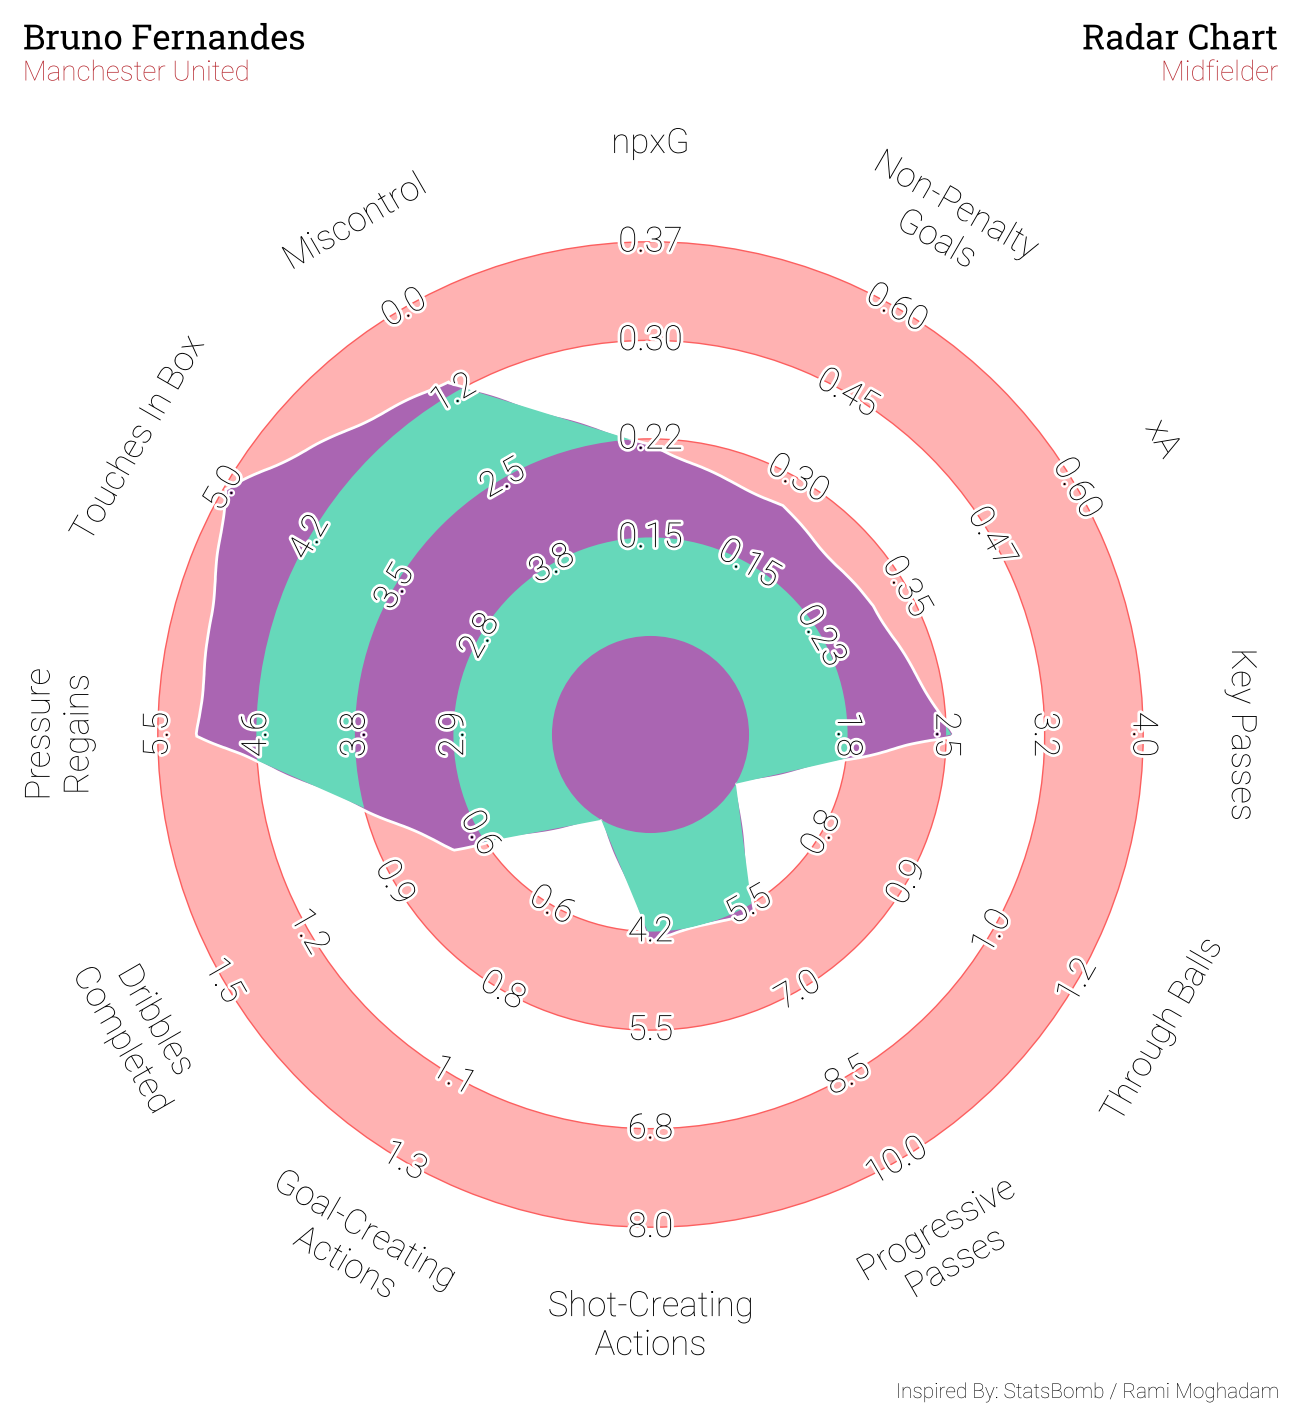

In [21]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot the radar
radar.setup_axis(ax=axs['radar'])
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar(bruno_values, ax=axs['radar'],
                                kwargs_radar={'facecolor': '#aa65b2'},
                                kwargs_rings={'facecolor': '#66d8ba'})
radar_poly, rings_outer, vertices = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.5, 'Inspired By: StatsBomb / Rami Moghadam', fontsize=15,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Bruno Fernandes', fontsize=25,
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Manchester United', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#B6282F')
title3_text = axs['title'].text(0.99, 0.65, 'Radar Chart', fontsize=25,
                                fontproperties=robotto_bold.prop, ha='right', va='center')
title4_text = axs['title'].text(0.99, 0.25, 'Midfielder', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#B6282F')
# sphinx_gallery_thumbnail_path = 'gallery/radar/images/sphx_glr_plot_radar_004.png'

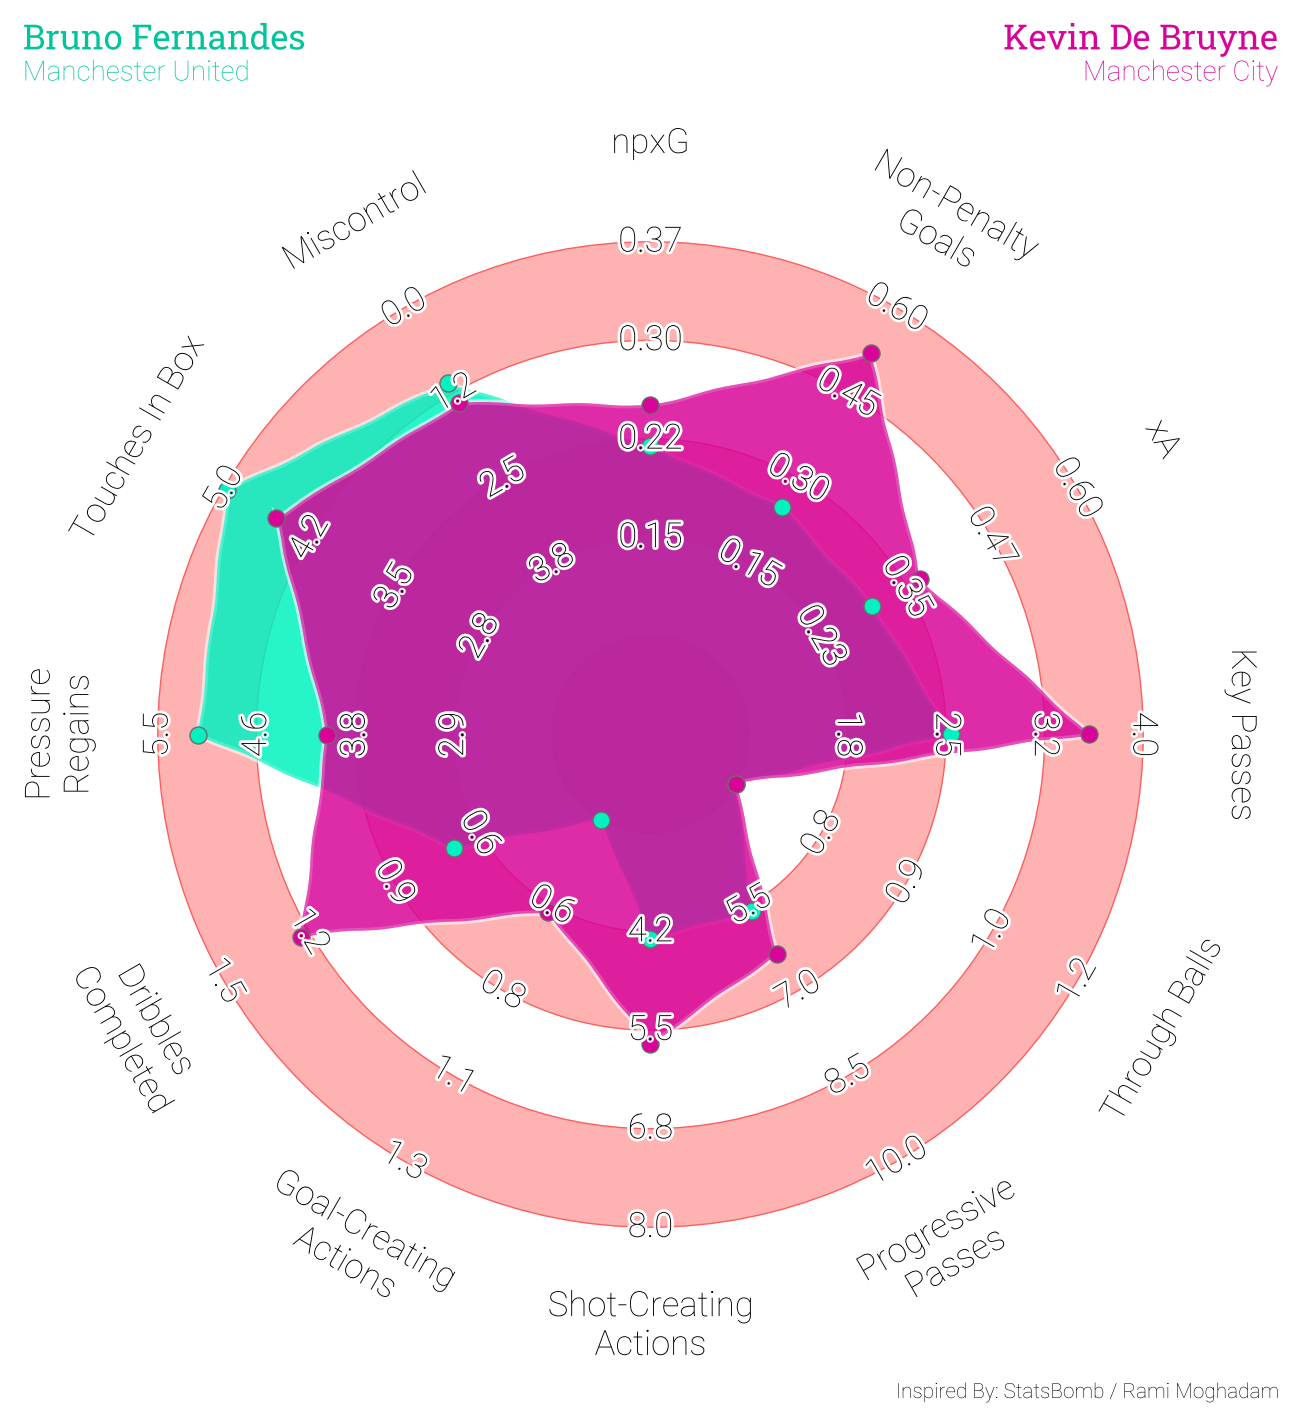

In [22]:
# creating the figure using the grid function from mplsoccer:
fig, axs = grid(figheight=14, grid_height=0.915, title_height=0.06, endnote_height=0.025,
                title_space=0, endnote_space=0, grid_key='radar', axis=False)

# plot radar
radar.setup_axis(ax=axs['radar'])  # format axis as a radar
rings_inner = radar.draw_circles(ax=axs['radar'], facecolor='#ffb2b2', edgecolor='#fc5f5f')
radar_output = radar.draw_radar_compare(bruno_values, bruyne_values, ax=axs['radar'],
                                        kwargs_radar={'facecolor': '#00f2c1', 'alpha': 0.6},
                                        kwargs_compare={'facecolor': '#d80499', 'alpha': 0.6})
radar_poly, radar_poly2, vertices1, vertices2 = radar_output
range_labels = radar.draw_range_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
param_labels = radar.draw_param_labels(ax=axs['radar'], fontsize=25,
                                       fontproperties=robotto_thin.prop)
axs['radar'].scatter(vertices1[:, 0], vertices1[:, 1],
                     c='#00f2c1', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)
axs['radar'].scatter(vertices2[:, 0], vertices2[:, 1],
                     c='#d80499', edgecolors='#6d6c6d', marker='o', s=150, zorder=2)

# adding the endnote and title text (these axes range from 0-1, i.e. 0, 0 is the bottom left)
# Note we are slightly offsetting the text from the edges by 0.01 (1%, e.g. 0.99)
endnote_text = axs['endnote'].text(0.99, 0.5, 'Inspired By: StatsBomb / Rami Moghadam', fontsize=15,
                                   fontproperties=robotto_thin.prop, ha='right', va='center')
title1_text = axs['title'].text(0.01, 0.65, 'Bruno Fernandes', fontsize=25, color='#01c49d',
                                fontproperties=robotto_bold.prop, ha='left', va='center')
title2_text = axs['title'].text(0.01, 0.25, 'Manchester United', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='left', va='center', color='#01c49d')
title3_text = axs['title'].text(0.99, 0.65, 'Kevin De Bruyne', fontsize=25,
                                fontproperties=robotto_bold.prop,
                                ha='right', va='center', color='#d80499')
title4_text = axs['title'].text(0.99, 0.25, 'Manchester City', fontsize=20,
                                fontproperties=robotto_thin.prop,
                                ha='right', va='center', color='#d80499')


#### Bumpy Charts

In [24]:
import json
from urllib.request import urlopen

import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from highlight_text import fig_text

from mplsoccer import Bumpy, FontManager, add_image

In [25]:
font_normal = FontManager("https://raw.githubusercontent.com/google/fonts/main/apache/"
                          "roboto/Roboto%5Bwdth,wght%5D.ttf")
font_bold = FontManager("https://raw.githubusercontent.com/google/fonts/main/apache/"
                        "robotoslab/RobotoSlab%5Bwght%5D.ttf")

In [26]:
epl = Image.open(
    urlopen("https://raw.githubusercontent.com/andrewRowlinson/mplsoccer-assets/main/epl.png")
)

season_dict = json.load(
    urlopen("https://raw.githubusercontent.com/andrewRowlinson/mplsoccer-assets/main/epl.json")
)

player_dict = json.load(
    urlopen("https://raw.githubusercontent.com/andrewRowlinson/mplsoccer-assets/main/"
            "percentile.json")
)

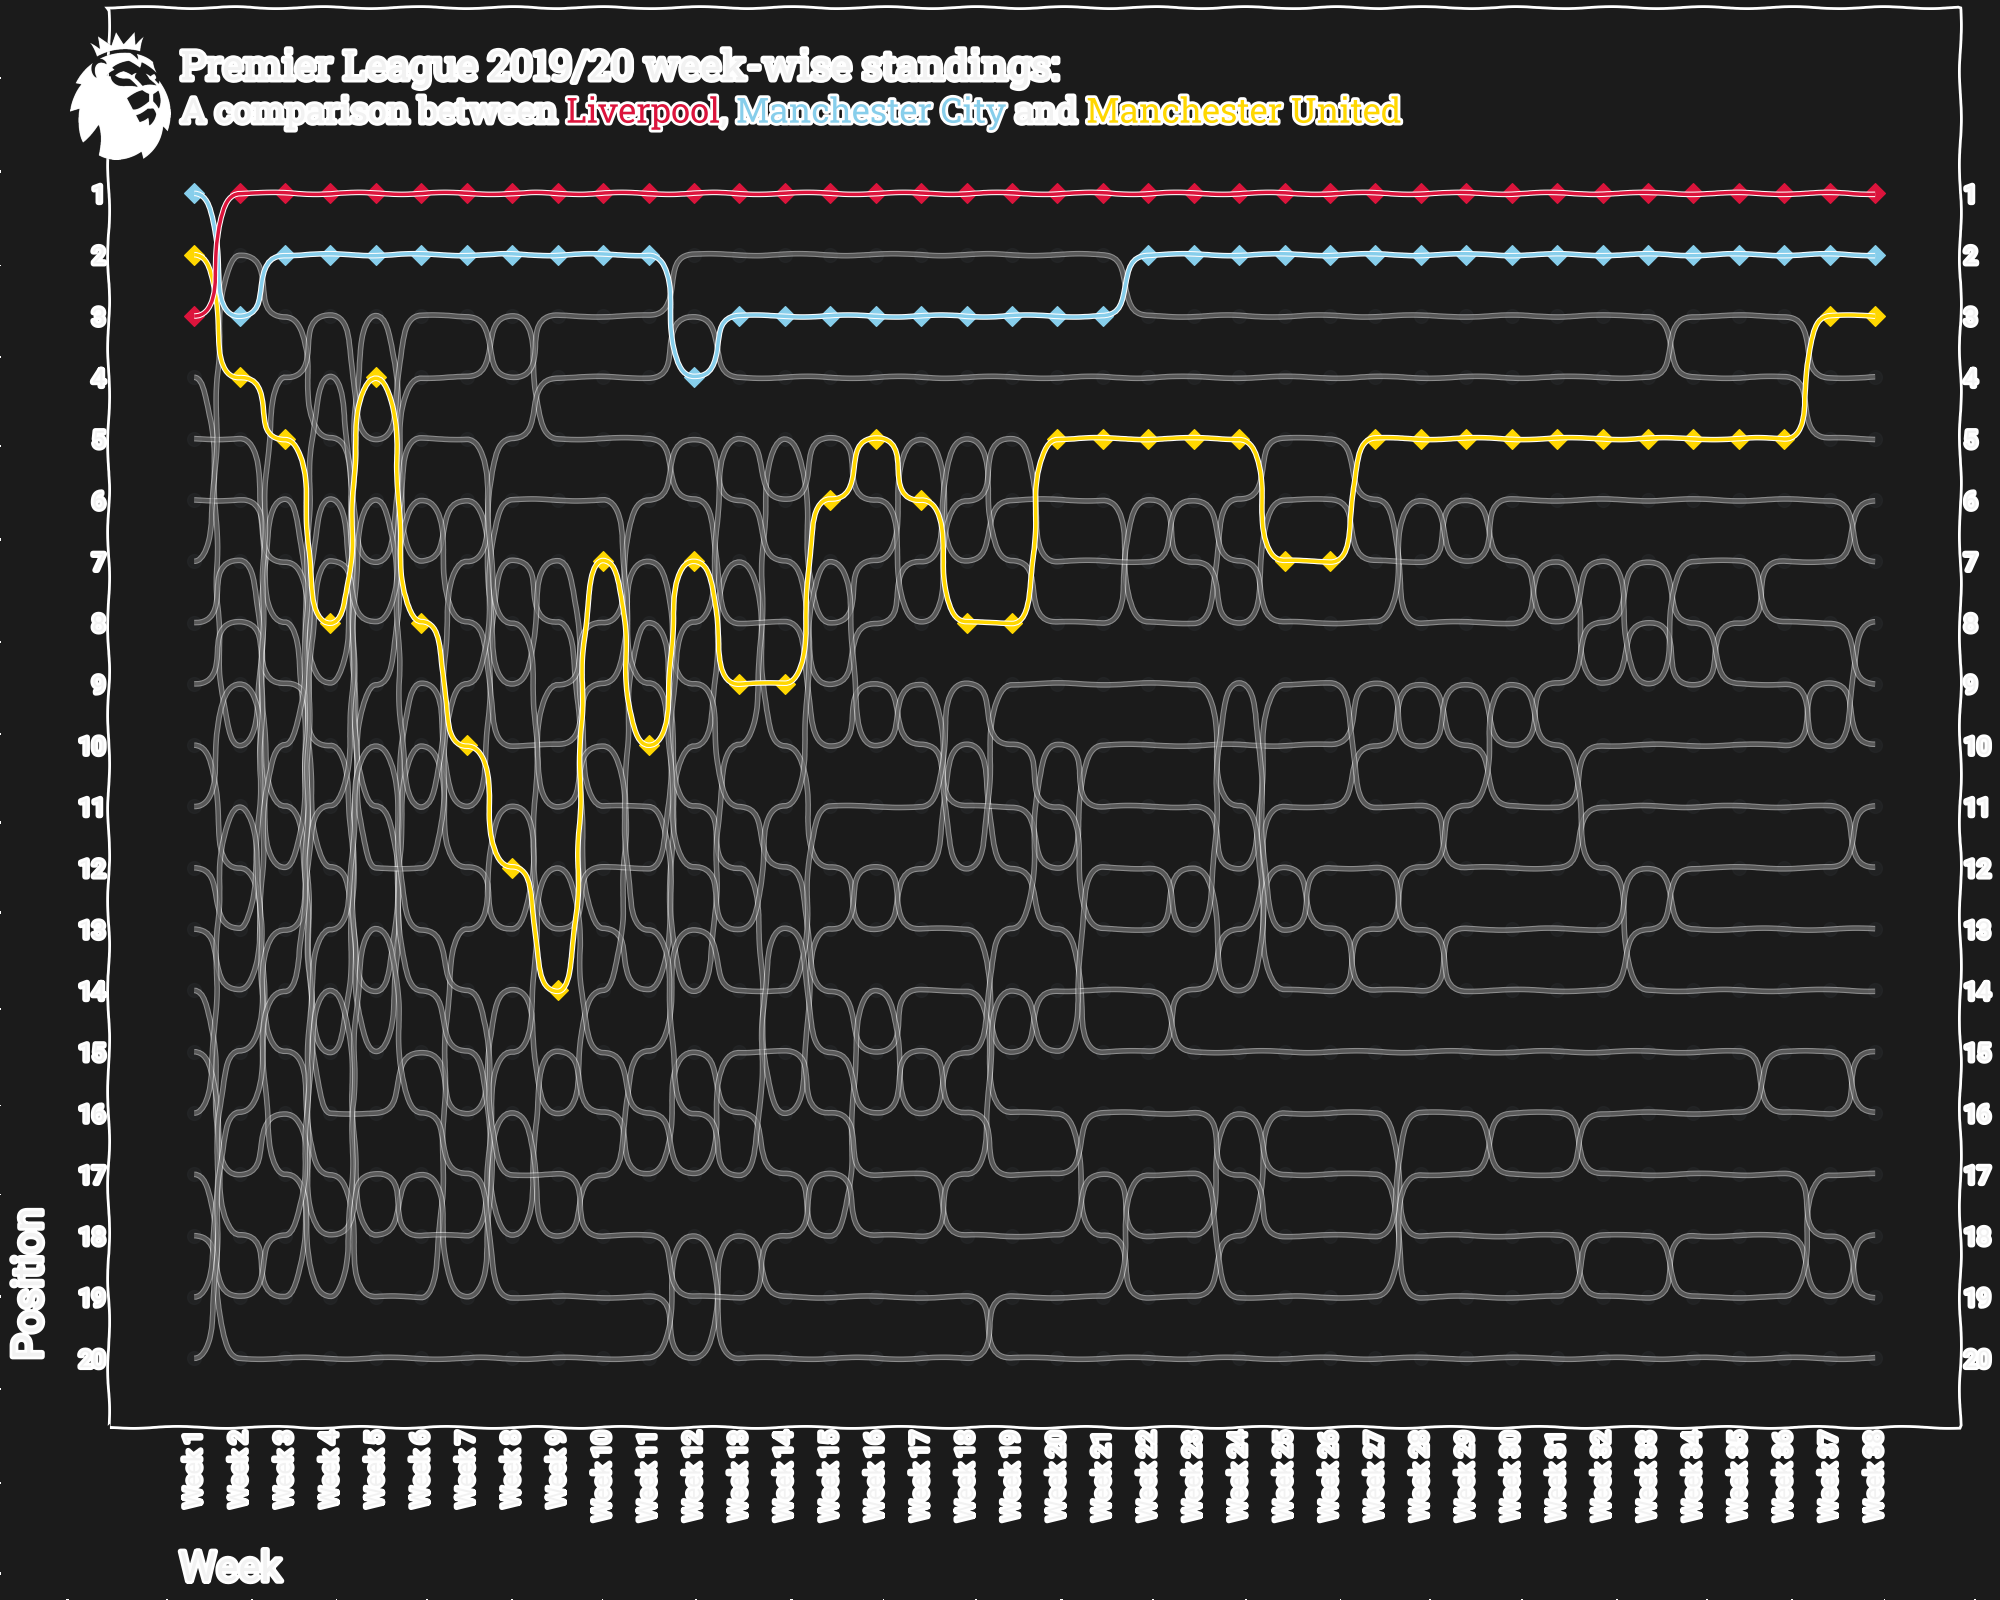

In [27]:
# match-week
match_day = ["Week " + str(num) for num in range(1, 39)]

# highlight dict --> team to highlight and their corresponding colors
highlight_dict = {
    "Liverpool": "crimson",
    "Man City": "skyblue",
    "Man Utd": "gold"
}

# instantiate object
bumpy = Bumpy(
    scatter_color="#282A2C", line_color="#252525",  # scatter and line colors
    rotate_xticks=90,  # rotate x-ticks by 90 degrees
    ticklabel_size=17, label_size=30,  # ticklable and label font-size
    scatter_primary='D',  # marker to be used
    show_right=True,  # show position on the rightside
    plot_labels=True,  # plot the labels
    alignment_yvalue=0.1,  # y label alignment
    alignment_xvalue=0.065  # x label alignment
)

# plot bumpy chart
fig, ax = bumpy.plot(
    x_list=match_day,  # match-day or match-week
    y_list=np.linspace(1, 20, 20).astype(int),  # position value from 1 to 20
    values=season_dict,  # values having positions for each team
    secondary_alpha=0.5,   # alpha value for non-shaded lines/markers
    highlight_dict=highlight_dict,  # team to be highlighted with their colors
    figsize=(20, 16),  # size of the figure
    x_label='Week', y_label='Position',  # label name
    ylim=(-0.1, 23),  # y-axis limit
    lw=2.5,   # linewidth of the connecting lines
    fontproperties=font_normal.prop,   # fontproperties for ticklables/labels
)

# title and subtitle
TITLE = "Premier League 2019/20 week-wise standings:"
SUB_TITLE = "A comparison between <Liverpool>, <Manchester City> and <Manchester United>"

# add title
fig.text(0.09, 0.95, TITLE, size=29, color="#F2F2F2", fontproperties=font_bold.prop)

# add subtitle
fig_text(
    0.09, 0.94, SUB_TITLE, color="#F2F2F2",
    highlight_textprops=[{"color": 'crimson'}, {"color": 'skyblue'}, {"color": 'gold'}],
    size=25, fig=fig, fontproperties=font_bold.prop
)

# add image
fig = add_image(
     epl,
     fig,  # figure
     0.02, 0.9,  # left and bottom dimensions
     0.08, 0.08  # height and width values
)

# if space is left in the plot use this
plt.tight_layout(pad=0.5)

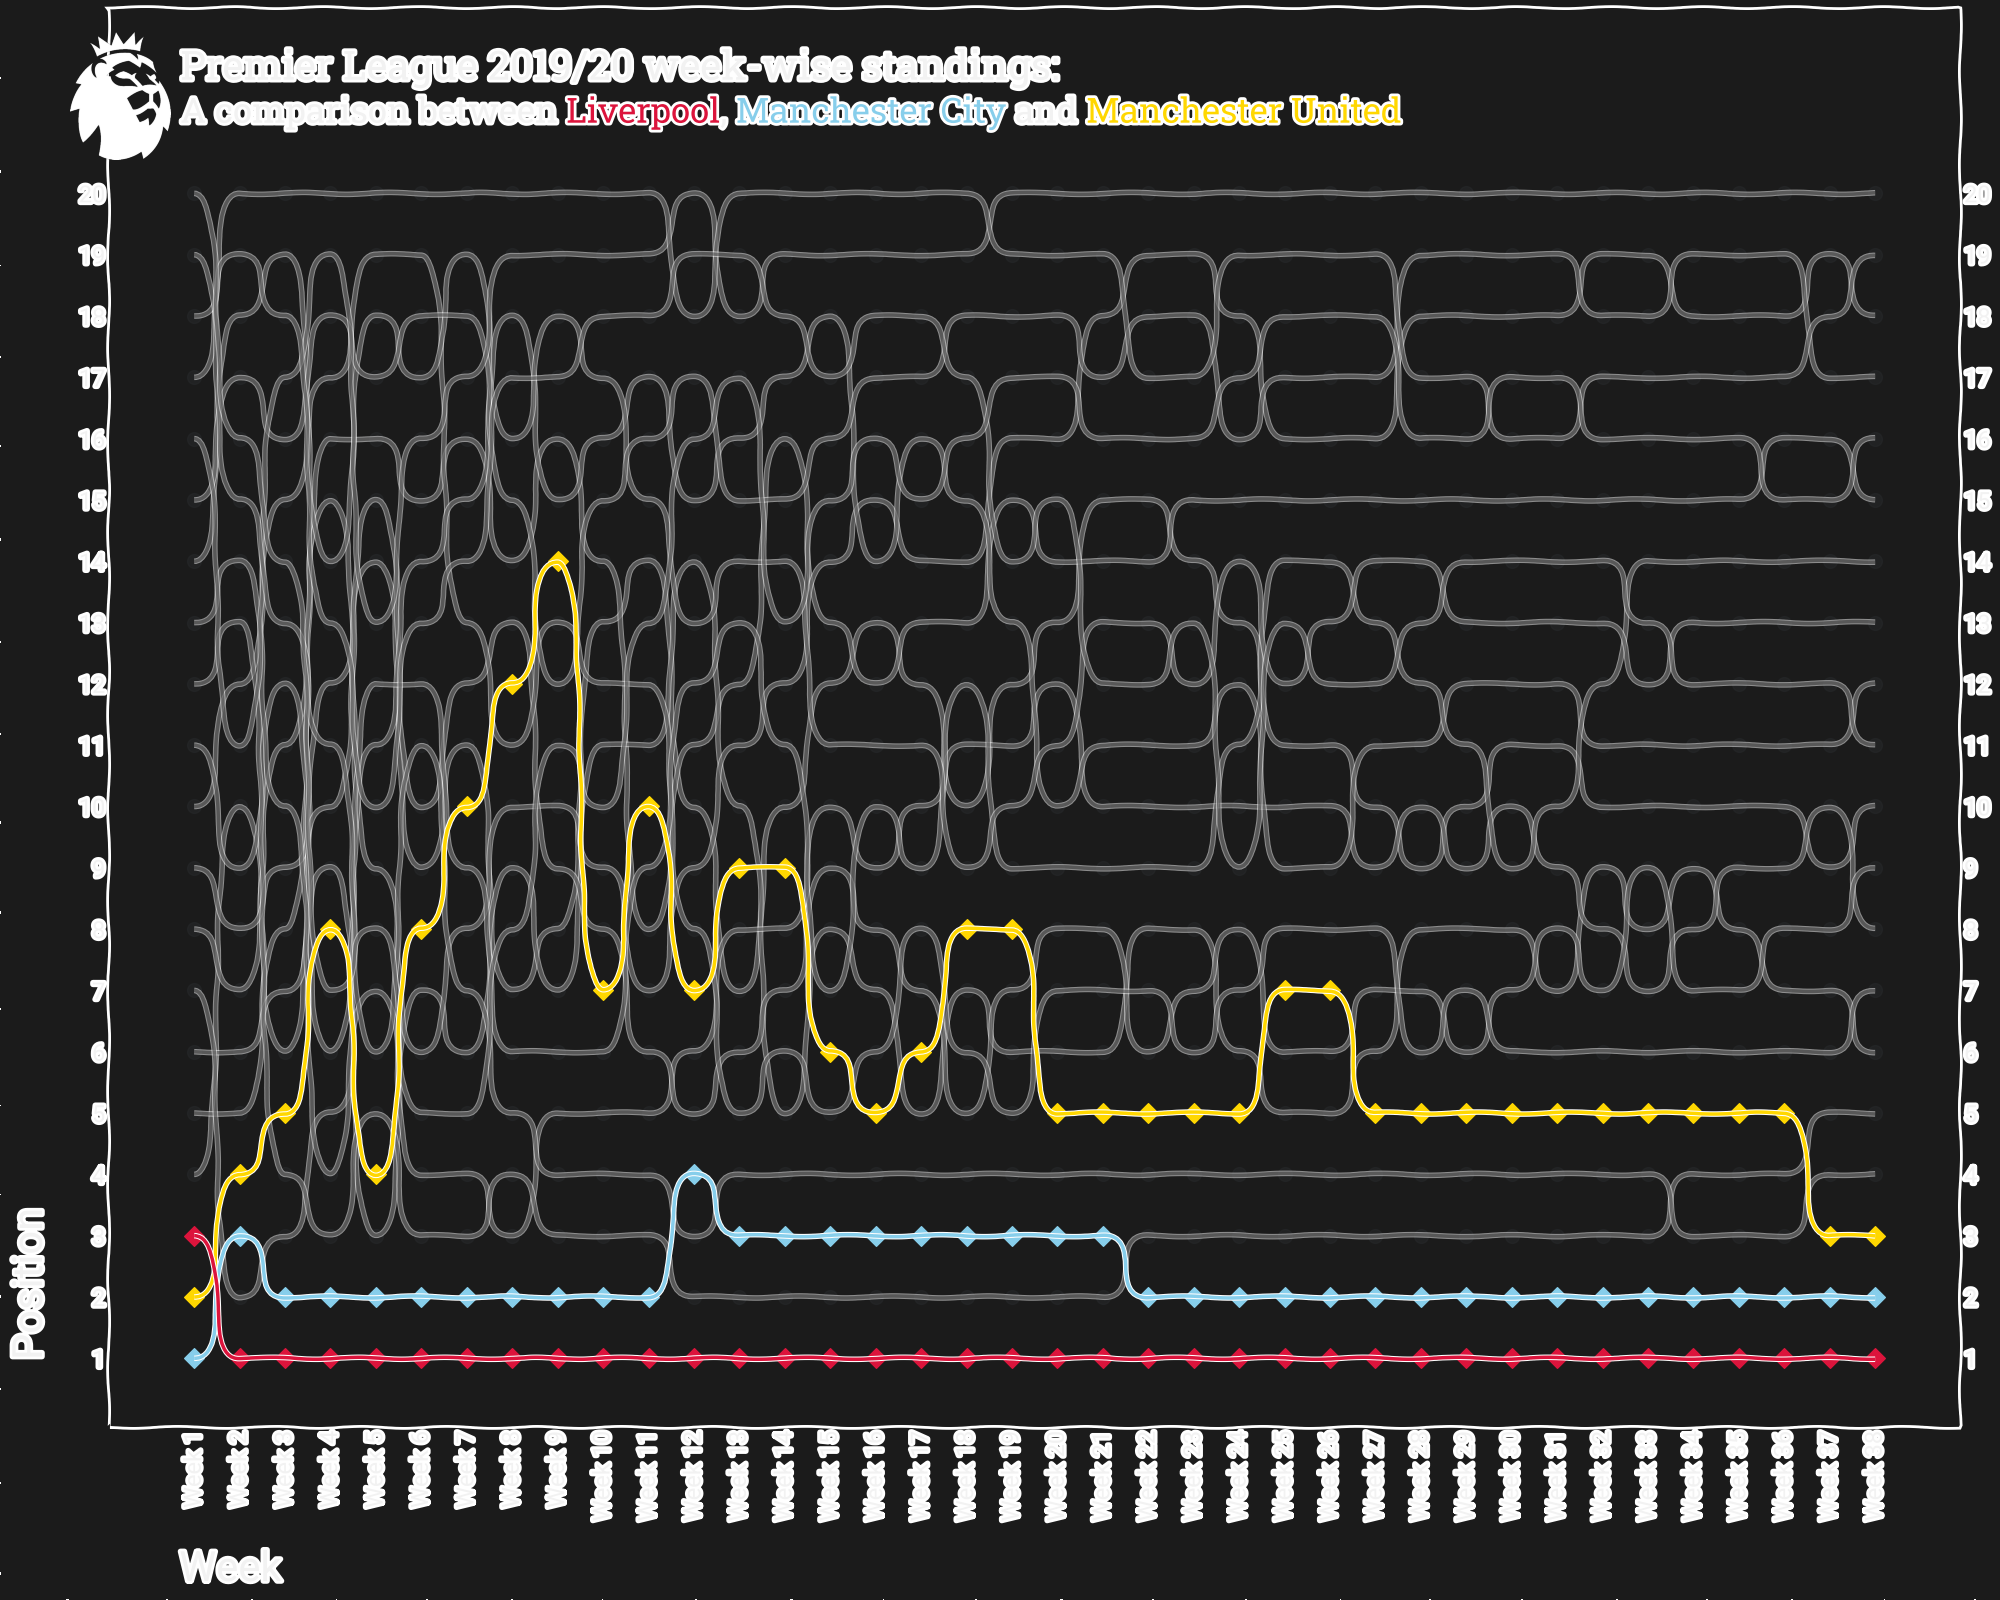

In [28]:
# instantiate object
bumpy = Bumpy(
    scatter_color="#282A2C", line_color="#252525",  # scatter and line colors
    rotate_xticks=90,  # rotate x-ticks by 90 degrees
    ticklabel_size=17, label_size=30,  # ticklable and label font-size
    scatter_primary='D',  # marker to be used
    show_right=True,  # show position on the rightside
    plot_labels=True,  # plot the labels
    alignment_yvalue=0.1,  # y label alignment
    alignment_xvalue=0.065,  # x label alignment
)

# plot bumpy chart
fig, ax = bumpy.plot(
    x_list=match_day,  # match-day or match-week
    y_list=np.linspace(1, 20, 20).astype(int),  # position value from 1 to 20
    values=season_dict,  # values having positions for each team
    secondary_alpha=0.5,   # alpha value for non-shaded lines/markers
    highlight_dict=highlight_dict,  # team to be highlighted with their colors
    figsize=(20, 16),  # size of the figure
    x_label='Week', y_label='Position',  # label name
    ylim=(-0.1, 23),  # y-axis limit
    lw=2.5,   # linewidth of the connecting lines
    upside_down=True,    # <--- to flip the y-axis
    fontproperties=font_normal.prop,   # fontproperties for ticklables/labels
)

# title and subtitle
TITLE = "Premier League 2019/20 week-wise standings:"
SUB_TITLE = "A comparison between <Liverpool>, <Manchester City> and <Manchester United>"

# add title
fig.text(0.09, 0.95, TITLE, size=29, color="#F2F2F2", fontproperties=font_bold.prop)

# add subtitle
fig_text(
    0.09, 0.94, SUB_TITLE, color="#F2F2F2",
    highlight_textprops=[{"color": 'crimson'}, {"color": 'skyblue'}, {"color": 'gold'}],
    size=25, fig=fig, fontproperties=font_bold.prop
)

# add image
fig = add_image(
     epl,
     fig,  # figure
     0.02, 0.9,  # left and bottom dimensions
     0.08, 0.08  # height and width values
)

# if space is left in the plot use this
plt.tight_layout(pad=0.5)

Now, what i want to achieve is plot the bumper plot for teams, whose average position is in top 5.

In [32]:
df = pd.DataFrame(season_dict)

In [34]:
df[['Man City']].mean()

Man City    2.289474
dtype: float64

In [44]:
mean_values = df.mean()
selected_columns = mean_values[mean_values <= 7].index
df_top = df[selected_columns]

In [45]:
df_top

Man City  Man Utd  Liverpool  Leicester  Chelsea
0          1        2          3         12       19
1          3        4          1         13       15
2          2        5          1          4       13
3          2        8          1          3       11
4          2        4          1          5        6
5          2        8          1          3       11
6          2       10          1          3        7
7          2       12          1          4        5
8          2       14          1          3        4
9          2        7          1          3        4
10         2       10          1          3        4
11         4        7          1          2        3
12         3        9          1          2        4
13         3        9          1          2        4
14         3        6          1          2        4
15         3        5          1          2        4
16         3        6          1          2        4
17         3        8          1          2        4
18         3        8          1          2        4
19         3        5          1          2        4
20         3        5          1          2        4
21         2        5          1          3        4
22         2        5          1          3        4
23         2        5          1          3        4
24         2        7          1          3        4
25         2        7          1          3        4
26         2        5          1          3        4
27         2        5          1          3        4
28         2        5          1          3        4
29         2        5          1          3        4
30         2        5          1          3        4
31         2        5          1          3        4
32         2        5          1          3        4
33         2        5          1          4        3
34         2        5          1          4        3
35         2        5          1          4        3
36         2        3          1          5        4
37         2        3          1          5        4

In [47]:
dictionary_top5 = df_top.to_dict()

In [56]:
dictionary_top5

{'Man City': {0: 1,
  1: 3,
  2: 2,
  3: 2,
  4: 2,
  5: 2,
  6: 2,
  7: 2,
  8: 2,
  9: 2,
  10: 2,
  11: 4,
  12: 3,
  13: 3,
  14: 3,
  15: 3,
  16: 3,
  17: 3,
  18: 3,
  19: 3,
  20: 3,
  21: 2,
  22: 2,
  23: 2,
  24: 2,
  25: 2,
  26: 2,
  27: 2,
  28: 2,
  29: 2,
  30: 2,
  31: 2,
  32: 2,
  33: 2,
  34: 2,
  35: 2,
  36: 2,
  37: 2},
 'Man Utd': {0: 2,
  1: 4,
  2: 5,
  3: 8,
  4: 4,
  5: 8,
  6: 10,
  7: 12,
  8: 14,
  9: 7,
  10: 10,
  11: 7,
  12: 9,
  13: 9,
  14: 6,
  15: 5,
  16: 6,
  17: 8,
  18: 8,
  19: 5,
  20: 5,
  21: 5,
  22: 5,
  23: 5,
  24: 7,
  25: 7,
  26: 5,
  27: 5,
  28: 5,
  29: 5,
  30: 5,
  31: 5,
  32: 5,
  33: 5,
  34: 5,
  35: 5,
  36: 3,
  37: 3},
 'Liverpool': {0: 3,
  1: 1,
  2: 1,
  3: 1,
  4: 1,
  5: 1,
  6: 1,
  7: 1,
  8: 1,
  9: 1,
  10: 1,
  11: 1,
  12: 1,
  13: 1,
  14: 1,
  15: 1,
  16: 1,
  17: 1,
  18: 1,
  19: 1,
  20: 1,
  21: 1,
  22: 1,
  23: 1,
  24: 1,
  25: 1,
  26: 1,
  27: 1,
  28: 1,
  29: 1,
  30: 1,
  31: 1,
  32: 1,
  33: 1

In [57]:
season_dict

{'Man City': [1,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  4,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  3,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2,
  2],
 'Man Utd': [2,
  4,
  5,
  8,
  4,
  8,
  10,
  12,
  14,
  7,
  10,
  7,
  9,
  9,
  6,
  5,
  6,
  8,
  8,
  5,
  5,
  5,
  5,
  5,
  7,
  7,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  5,
  3,
  3],
 'Liverpool': [3,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1,
  1],
 'Burnley': [4,
  10,
  6,
  12,
  14,
  9,
  11,
  7,
  8,
  13,
  14,
  10,
  7,
  10,
  12,
  13,
  12,
  10,
  12,
  13,
  15,
  15,
  14,
  13,
  11,
  11,
  10,
  9,
  10,
  11,
  11,
  10,
  10,
  10,
  10,
  10,
  9,
  10],
 'Brighton': [5,
  5,
  8,
  16,
  16,
  15,
  16,
  14,
  16,
  14,
  8,
  11,
  12,
  16,
  13,
  12,
  13,
  13,
  15,
  14,
  14,
  14,
  15,
  15,
  1

AssertionError: Number of highlights (3) should be equal to number of highlight_textprops (5)

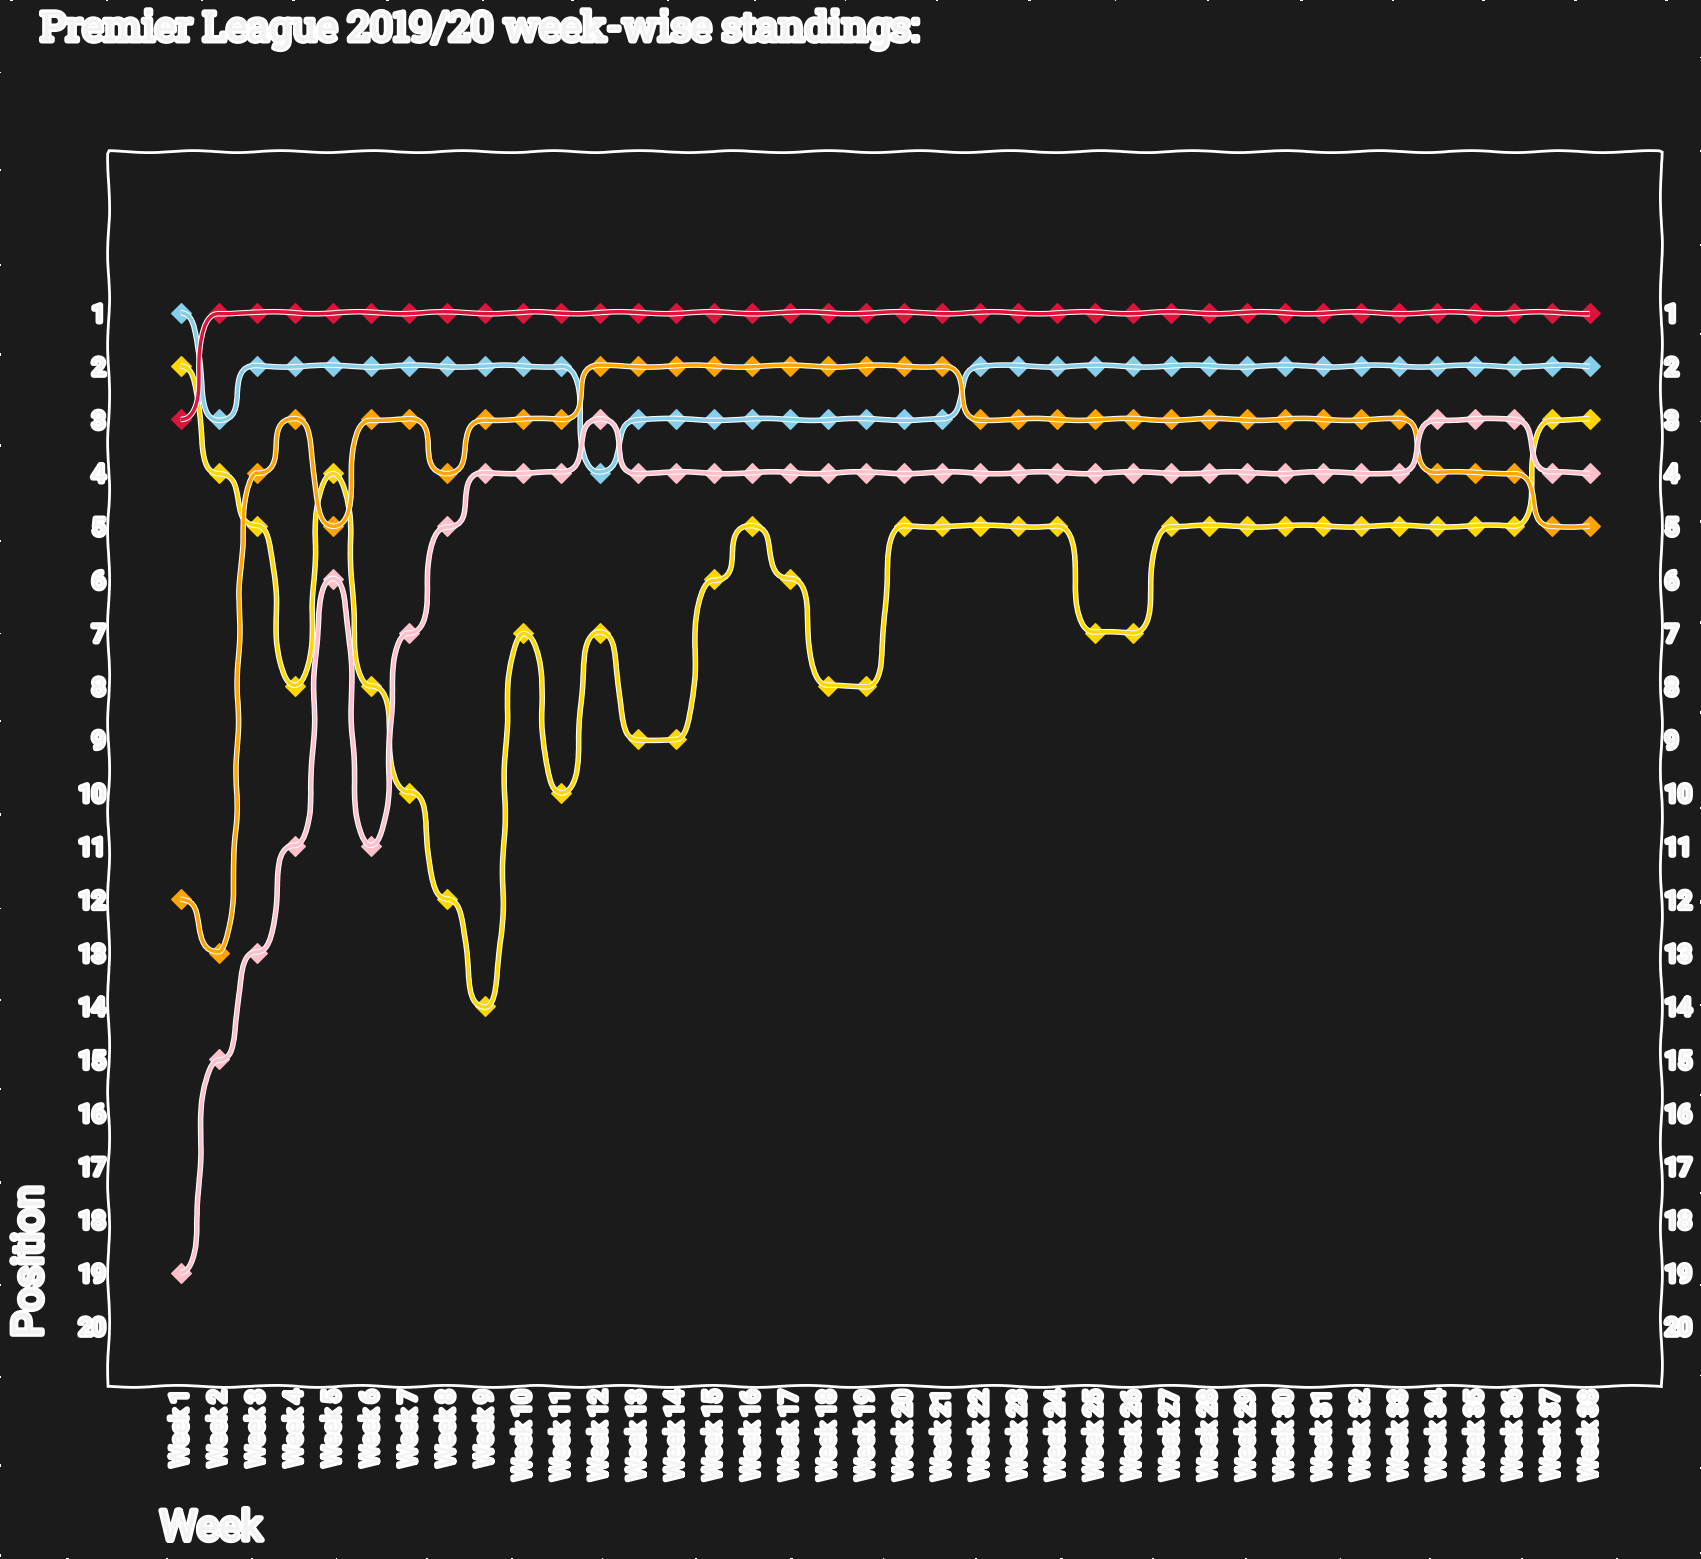

In [60]:
# match-week
match_day = ["Week " + str(num) for num in range(1, 39)]

# highlight dict --> team to highlight and their corresponding colors
highlight_dict5 = {
    "Liverpool": "crimson",
    "Man City": "skyblue",
    "Man Utd": "gold",
    "Chelsea": "pink",
    "Leicester": "orange"
}

# instantiate object
bumpy = Bumpy(
    scatter_color="#282A2C", line_color="#252525",  # scatter and line colors
    rotate_xticks=90,  # rotate x-ticks by 90 degrees
    ticklabel_size=17, label_size=30,  # ticklable and label font-size
    scatter_primary='D',  # marker to be used
    show_right=True,  # show position on the rightside
    plot_labels=True,  # plot the labels
    alignment_yvalue=0.1,  # y label alignment
    alignment_xvalue=0.065  # x label alignment
)

# plot bumpy chart
fig, ax = bumpy.plot(
    x_list=match_day,  # match-day or match-week
    y_list=np.linspace(1, 20, 20).astype(int),  # position value from 1 to 20
    values=df_top,  # values having positions for each team
    secondary_alpha=0.5,   # alpha value for non-shaded lines/markers
    highlight_dict=highlight_dict5,  # team to be highlighted with their colors
    figsize=(20, 16),  # size of the figure
    x_label='Week', y_label='Position',  # label name
    ylim=(-0.1, 23),  # y-axis limit
    lw=2.5,   # linewidth of the connecting lines
    fontproperties=font_normal.prop,   # fontproperties for ticklables/labels
)

# title and subtitle
TITLE = "Premier League 2019/20 week-wise standings:"
SUB_TITLE = "A comparison between <Liverpool>, <Manchester City> and <Manchester United>"

# add title
fig.text(0.09, 0.95, TITLE, size=29, color="#F2F2F2", fontproperties=font_bold.prop)

# add subtitle
fig_text(
    0.09, 0.94, SUB_TITLE, color="#F2F2F2",
highlight_textprops = [
    {"color": 'crimson'},
    {"color": 'skyblue'},
    {"color": 'gold'},
    {"color": 'pink'},
    {"color": 'orange'}
],
    size=25, fig=fig, fontproperties=font_bold.prop
)

# add image
fig = add_image(
     epl,
     fig,  # figure
     0.02, 0.9,  # left and bottom dimensions
     0.08, 0.08  # height and width values
)

# if space is left in the plot use this
plt.tight_layout(pad=0.5)

findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Liberation Serif'] not found. Falling back to DejaVu Sans.


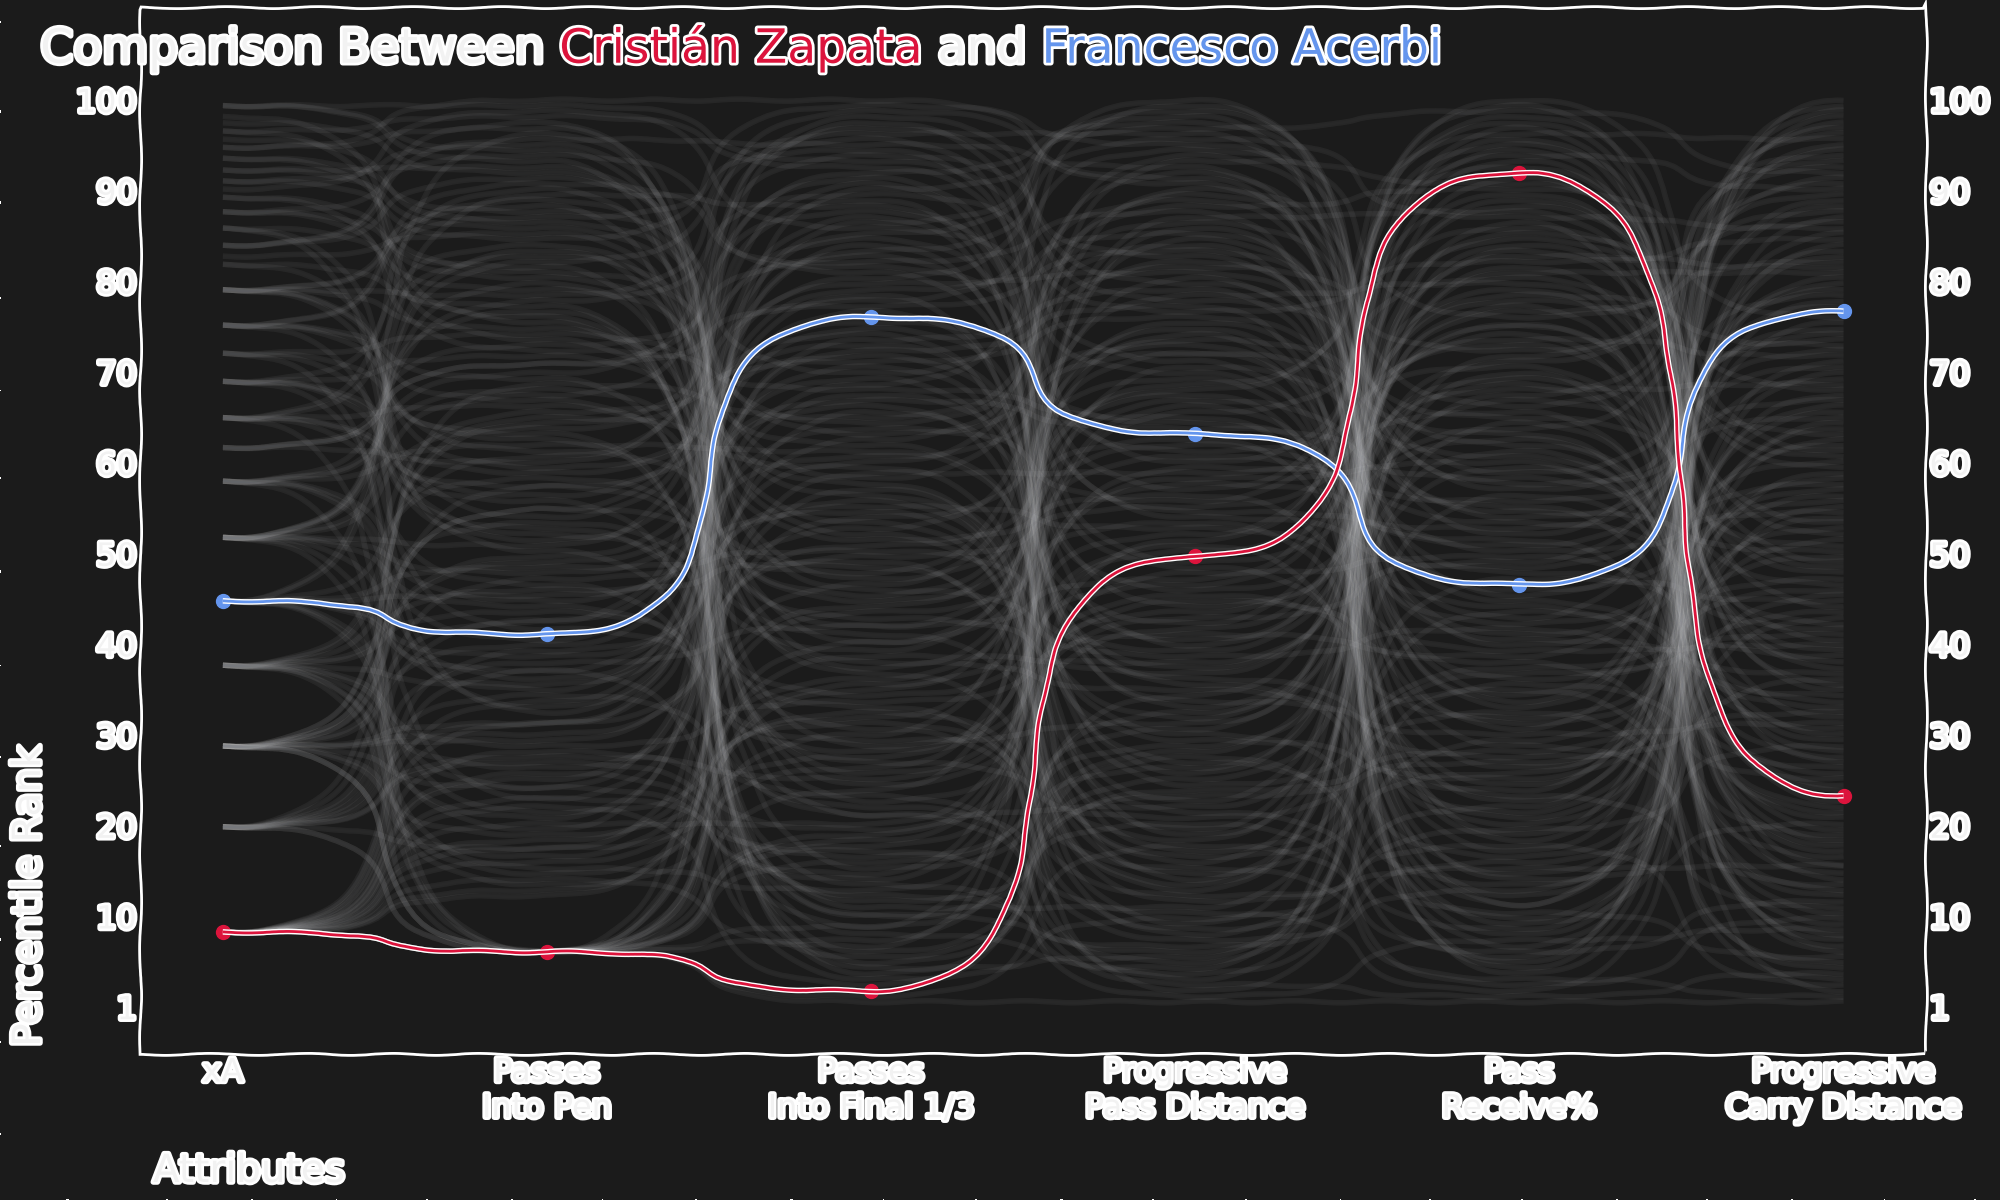

In [61]:
# attributes and highlight dict
attribute = [
    "xA", "Passes\nInto Pen", "Passes\nInto Final 1/3", "Progressive\nPass Distance",
    "Pass\nReceive%", "Progressive\nCarry Distance"
]
highlight_dict = {
    "Cristián Zapata": "crimson",
    "Francesco Acerbi": "cornflowerblue"
}

# instantiate object
bumpy = Bumpy(
    rotate_xticks=0, ticklabel_size=23, label_size=28, scatter="value",
    show_right=True, alignment_yvalue=0.15, alignment_xvalue=0.06
)

# plot bumpy chart
fig, ax = bumpy.plot(
    x_list=attribute, y_list=np.linspace(1, 100, 11).astype(int), values=player_dict,
    secondary_alpha=0.05, highlight_dict=highlight_dict,
    figsize=(20, 12),
    x_label="Attributes", y_label="Percentile Rank", ylim=(0.5, 12),
    upside_down=True,
    fontfamily="Liberation Serif"
)

# title and subtitle
TITLE = "Comparison Between <Cristián Zapata> and <Francesco Acerbi>"

# add title
fig_text(
    0.02, 0.98, TITLE, color="#F2F2F2",
    highlight_textprops=[{"color": 'crimson'}, {"color": 'cornflowerblue'}],
    size=34, fig=fig, fontfamily="Liberation Serif"
)
# if space is left in the plot use this
plt.tight_layout(pad=0.5)

#### Integrating data from statsbomb api

In [62]:
from statsbombpy import sb
sb.competitions()


competition_id  season_id              country_name  \
0               16          4                    Europe   
1               16          1                    Europe   
2               16          2                    Europe   
3               16         27                    Europe   
4               16         26                    Europe   
5               16         25                    Europe   
6               16         24                    Europe   
7               16         23                    Europe   
8               16         22                    Europe   
9               16         21                    Europe   
10              16         41                    Europe   
11              16         39                    Europe   
12              16         37                    Europe   
13              16         44                    Europe   
14              16         76                    Europe   
15              37         90                   England   
16              37         42                   England   
17              37          4                   England   
18              43        106             International   
19              43          3             International   
20            1238        108                     India   
21              11         90                     Spain   
22              11         42                     Spain   
23              11          4                     Spain   
24              11          1                     Spain   
25              11          2                     Spain   
26              11         27                     Spain   
27              11         26                     Spain   
28              11         25                     Spain   
29              11         24                     Spain   
30              11         23                     Spain   
31              11         22                     Spain   
32              11         21                     Spain   
33              11         41                     Spain   
34              11         40                     Spain   
35              11         39                     Spain   
36              11         38                     Spain   
37              11         37                     Spain   
38              49          3  United States of America   
39               2         44                   England   
40              55         43                    Europe   
41              53        106                    Europe   
42              72         30             International   

           competition_name competition_gender  competition_youth  \
0          Champions League               male              False   
1          Champions League               male              False   
2          Champions League               male              False   
3          Champions League               male              False   
4          Champions League               male              False   
5          Champions League               male              False   
6          Champions League               male              False   
7          Champions League               male              False   
8          Champions League               male              False   
9          Champions League               male              False   
10         Champions League               male              False   
11         Champions League               male              False   
12         Champions League               male              False   
13         Champions League               male              False   
14         Champions League               male              False   
15  FA Women's Super League             female              False   
16  FA Women's Super League             female              False   
17  FA Women's Super League             female              False   
18           FIFA World Cup               male              False   
19           FIFA World Cup

In [63]:
from mplsoccer import Sbopen

# instantiate a parser object
parser = Sbopen()

In [64]:
df_competition = parser.competition()
df_competition.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   competition_id             43 non-null     int64 
 1   season_id                  43 non-null     int64 
 2   country_name               43 non-null     object
 3   competition_name           43 non-null     object
 4   competition_gender         43 non-null     object
 5   competition_youth          43 non-null     bool  
 6   competition_international  43 non-null     bool  
 7   season_name                43 non-null     object
 8   match_updated              43 non-null     object
 9   match_updated_360          42 non-null     object
 10  match_available_360        4 non-null      object
 11  match_available            43 non-null     object
dtypes: bool(2), int64(2), object(8)
memory usage: 3.6+ KB


In [65]:
df_match = parser.match(competition_id=11, season_id=1)
df_match.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 52 columns):
 #   Column                           Non-Null Count  Dtype         
---  ------                           --------------  -----         
 0   match_id                         36 non-null     int64         
 1   match_date                       36 non-null     datetime64[ns]
 2   kick_off                         36 non-null     datetime64[ns]
 3   home_score                       36 non-null     int64         
 4   away_score                       36 non-null     int64         
 5   match_status                     36 non-null     object        
 6   match_status_360                 36 non-null     object        
 7   last_updated                     36 non-null     datetime64[ns]
 8   last_updated_360                 36 non-null     datetime64[ns]
 9   match_week                       36 non-null     int64         
 10  competition_id                   36 non-null     int64         


In [66]:
df_lineup = parser.lineup(7478)
df_lineup.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26 entries, 0 to 25
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   player_id        26 non-null     int64 
 1   player_name      26 non-null     object
 2   player_nickname  26 non-null     object
 3   jersey_number    26 non-null     int64 
 4   match_id         26 non-null     int64 
 5   team_id          26 non-null     int64 
 6   team_name        26 non-null     object
 7   country_id       26 non-null     int64 
 8   country_name     26 non-null     object
dtypes: int64(5), object(4)
memory usage: 2.0+ KB


In [67]:
df_event, df_related, df_freeze, df_tactics = parser.event(7478)

# exploring the data
df_event.info()
df_related.info()
df_freeze.info()
df_tactics.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3381 entries, 0 to 3380
Data columns (total 70 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3381 non-null   object 
 1   index                           3381 non-null   int64  
 2   period                          3381 non-null   int64  
 3   timestamp                       3381 non-null   object 
 4   minute                          3381 non-null   int64  
 5   second                          3381 non-null   int64  
 6   possession                      3381 non-null   int64  
 7   duration                        2583 non-null   float64
 8   match_id                        3381 non-null   int64  
 9   type_id                         3381 non-null   int64  
 10  type_name                       3381 non-null   object 
 11  possession_team_id              3381 non-null   int64  
 12  possession_team_name            33

In [70]:
df_tactics

jersey_number  match_id                                    id  player_id  \
0               1      7478  f33a5bad-a165-4f7d-9518-53b3762ea476       5066   
1               8      7478  f33a5bad-a165-4f7d-9518-53b3762ea476       5069   
2               4      7478  f33a5bad-a165-4f7d-9518-53b3762ea476       5007   
3               3      7478  f33a5bad-a165-4f7d-9518-53b3762ea476       5065   
4               7      7478  f33a5bad-a165-4f7d-9518-53b3762ea476       5000   
5               6      7478  f33a5bad-a165-4f7d-9518-53b3762ea476       5001   
6              20      7478  f33a5bad-a165-4f7d-9518-53b3762ea476       4998   
7              11      7478  f33a5bad-a165-4f7d-9518-53b3762ea476       5075   
8              17      7478  f33a5bad-a165-4f7d-9518-53b3762ea476       5006   
9              15      7478  f33a5bad-a165-4f7d-9518-53b3762ea476       8298   
10             14      7478  f33a5bad-a165-4f7d-9518-53b3762ea476       5002   
11              1      7478  240d7d20-95c8-417c-b825-b28f86bb0979       5056   
12             21      7478  240d7d20-95c8-417c-b825-b28f86bb0979       4959   
13              5      7478  240d7d20-95c8-417c-b825-b28f86bb0979       5054   
14             22      7478  240d7d20-95c8-417c-b825-b28f86bb0979       5045   
15              4      7478  240d7d20-95c8-417c-b825-b28f86bb0979       5038   
16             10      7478  240d7d20-95c8-417c-b825-b28f86bb0979       5053   
17              8      7478  240d7d20-95c8-417c-b825-b28f86bb0979       8382   
18             17      7478  240d7d20-95c8-417c-b825-b28f86bb0979       5059   
19             23      7478  240d7d20-95c8-417c-b825-b28f86bb0979       5105   
20              7      7478  240d7d20-95c8-417c-b825-b28f86bb0979       5051   
21              3      7478  240d7d20-95c8-417c-b825-b28f86bb0979       5058   
22              1      7478  61fe18e7-63ef-4eff-b38b-71d9446802e6       5066   
23              8      7478  61fe18e7-63ef-4eff-b38b-71d9446802e6       5069   
24              4      7478  61fe18e7-63ef-4eff-b38b-71d9446802e6       5007   
25              3      7478  61fe18e7-63ef-4eff-b38b-71d9446802e6       5065   
26              7      7478  61fe18e7-63ef-4eff-b38b-71d9446802e6       5000   
27              6      7478  61fe18e7-63ef-4eff-b38b-71d9446802e6       5001   
28             20      7478  61fe18e7-63ef-4eff-b38b-71d9446802e6       4998   
29              9      7478  61fe18e7-63ef-4eff-b38b-71d9446802e6       4994   
30             17      7478  61fe18e7-63ef-4eff-b38b-71d9446802e6       5006   
31             22      7478  61fe18e7-63ef-4eff-b38b-71d9446802e6       5077   
32             15      7478  61fe18e7-63ef-4eff-b38b-71d9446802e6       8298   

                     player_name  position_id              position_name  \
0   Lydia Grace Yilkari Williams            1                 Goalkeeper   
1                Theresa Nielsen            2                 Right Back   
2               Megan Montefusco            3          Right Center Back   
3                  Lauren Barnes            5           Left Center Back   
4         Stephanie-Elise Catley            6                  Left Back   
5                     Allie Long            9   Right Defensive Midfield   
6                    Rumi Utsugi           11    Left Defensive Midfield   
7                 Elizabeth Addo           17                 Right Wing   
8                  Beverly Yanez           19  Center Attacking Midfield   
9             Megan Anna Rapinoe           21                  Left Wing   
10                  Jodie Taylor           23             Center Forward   
11                 Jane Campbell            1                 Goalkeeper   
12                 Taylor Comeau            2                 Right Back   
13                Janine van Wyk            3          Right Center Back   
14                  Amber Brooks            5           Left Center Back   
15           Allysha Lyn Chapman            6                  Left

In [71]:
df_frame, df_visible = parser.frame(3788741)

# exploring the data
df_frame.info()
df_visible.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45737 entries, 0 to 45736
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   teammate  45737 non-null  bool   
 1   actor     45737 non-null  bool   
 2   keeper    45737 non-null  bool   
 3   match_id  45737 non-null  int64  
 4   id        45737 non-null  object 
 5   x         45737 non-null  float64
 6   y         45737 non-null  float64
dtypes: bool(3), float64(2), int64(1), object(1)
memory usage: 1.5+ MB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3370 entries, 0 to 3369
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   match_id      3370 non-null   int64 
 1   id            3370 non-null   object
 2   visible_area  3370 non-null   object
dtypes: int64(1), object(2)
memory usage: 79.1+ KB


In [72]:
df_frame

teammate  actor  keeper  match_id  \
0         False  False   False   3788741   
1         False  False   False   3788741   
2         False  False   False   3788741   
3         False  False   False   3788741   
4         False  False   False   3788741   
...         ...    ...     ...       ...   
45732      True  False   False   3788741   
45733     False  False   False   3788741   
45734     False  False   False   3788741   
45735     False  False   False   3788741   
45736     False  False   False   3788741   

                                         id           x          y  
0      5c888f58-fe77-459b-ab3b-a2fa5fb8ab16   43.653216  31.988432  
1      5c888f58-fe77-459b-ab3b-a2fa5fb8ab16   43.997359  45.599483  
2      5c888f58-fe77-459b-ab3b-a2fa5fb8ab16   49.675716  35.434268  
3      5c888f58-fe77-459b-ab3b-a2fa5fb8ab16   54.493715  30.093223  
4      5c888f58-fe77-459b-ab3b-a2fa5fb8ab16   58.279286  48.528443  
...                                     ...         ...        ...  
45732  feb59f80-cefc-4dea-85ea-dfb9e4efb799  109.810677  40.538527  
45733  feb59f80-cefc-4dea-85ea-dfb9e4efb799  110.065317   7.435455  
45734  feb59f80-cefc-4dea-85ea-dfb9e4efb799  110.564525  35.999170  
45735  feb59f80-cefc-4dea-85ea-dfb9e4efb799  110.646857  25.912043  
45736  feb59f80-cefc-4dea-85ea-dfb9e4efb799  110.858961  39.785305  

[45737 rows x 7 columns]